In [119]:
# Uncoomment as needed. Downloads dependencies.

# downloads requirements inside this environment
# %pip install -r requirements.txt

# downloads requirements into the PC itself
# !pip install -r requirements.txt

In [120]:
import numpy as np
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
hbnd_df = pd.read_csv("./src/h_bnd.csv")
sasa_ub_df = pd.read_csv("./src/sasa_unbnd.csv")
otw_binding_df = pd.read_csv("./src/otw_binding.csv")
sasa_bnd_df = pd.read_csv("./src/sasa_bnd.csv")
sasa_bndwh_df = pd.read_csv("./src/sasa_bnd_whole.csv")
sasa_bnd_fcc_df = pd.read_csv("./src/sasa_bnd_fcc.csv")

In [122]:
scaler = StandardScaler()
scaled_hbnd = scaler.fit_transform(hbnd_df)
sc_hbnd_df = pd.DataFrame(scaled_hbnd)
sc_hbnd_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.199868,0.515711,0.479093,-0.220779,0.275380,1.166667,0.300150,-0.452187,-0.351095,0.870186,1.347928,0.272195,1.056806,1.228769,0.473118,1.468919,NaN,-0.344258,-0.100205,0.535870
1,1.108358,-2.372269,-0.396491,0.482954,0.275380,-0.722222,1.125563,-1.186990,1.161314,0.085592,-0.646267,0.272195,-0.764152,-0.296600,0.473118,-1.303872,NaN,0.383980,-0.100205,1.389912
2,1.108358,-0.928279,0.479093,-1.628245,0.275380,-0.722222,0.300150,1.752224,-0.351095,0.870186,1.347928,-1.821615,0.146327,0.466085,-0.545906,0.544655,0.473804,-0.344258,NaN,-0.318173
3,-0.708623,-0.206284,-0.396491,-0.924512,1.303466,-0.722222,1.125563,1.017420,1.917519,0.870186,0.350831,NaN,1.967285,-0.296600,-0.545906,-1.303872,0.473804,-0.344258,-0.100205,1.389912
4,1.108358,-0.206284,-0.396491,-0.220779,0.275380,0.222222,-0.525263,-0.452187,-0.351095,0.870186,NaN,-1.821615,-1.674631,1.228769,0.473118,-0.379608,0.473804,1.112217,-0.100205,-1.172215


In [123]:
print(sc_hbnd_df.max().astype(str) + "     " + sc_hbnd_df.min().astype(str))

0       2.016848804946436     -2.525603458446437
1     1.9597003678917069     -3.0942637387763807
2       2.230262776535928     -2.147660451479042
3       1.890419586963519     -3.035710285634849
4      2.3315511514490495     -2.808876584029171
5      2.1111111111111103     -2.611111111111112
6     1.9509757318599086     -3.0015011259383213
7      2.487027043354575     -3.3914005136653285
8      1.917518758995955     -2.6197087270789794
9       1.654780571042197     -2.268190610307838
10     2.3450261470637264     -2.640462512048134
11    2.3660057778120636     -1.8216150678730052
12     1.9672846334406517     -3.495588398262313
13      1.991453913453068     -3.347337428995583
14    2.5111671121015937     -2.5839545646262794
15     1.4689188852229889     -2.228135387697794
16    2.3690177073967145     -2.3690177073967145
17    1.8404543161300067     -3.2572069191941124
18      2.175873670392699     -3.134975880368429
19      1.389912379166786     -2.880300352008281
dtype: object


In [124]:
print(hbnd_df.max().astype(str) + "     " + hbnd_df.min().astype(str))

ALA    11.0     6.0
ARG    11.0     4.0
ASN    11.0     6.0
ASP    11.0     4.0
CYS    11.0     6.0
GLU    11.0     6.0
GLN    11.0     5.0
GLY    12.0     4.0
HIS    11.0     5.0
ILE    11.0     6.0
LEU    11.0     6.0
LYS    11.0     7.0
MET    11.0     5.0
PHE    11.0     4.0
PRO    11.0     6.0
SER    10.0     6.0
THR    11.0     6.0
TRP    11.0     4.0
TYR    11.0     4.0
VAL    10.0     5.0
dtype: object


In [125]:
scaled_sasa_ub = scaler.fit_transform(sasa_ub_df)
sc_sasa_ub_df = pd.DataFrame(scaled_sasa_ub)
sc_sasa_ub_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.441384,-0.835355,-1.111849,-1.919606,-0.605410,-1.118416,-1.216699,-0.334828,-0.766414,-0.829482,-0.316460,-0.683671,NaN,-0.950283,-0.083965,-0.360104,-0.510945,-0.603737,-0.721731,-1.403299
1,-0.491258,-0.257499,-1.052298,-0.584169,0.704927,-1.329820,-0.829858,-1.624188,-0.864299,1.250216,-1.172094,0.238264,-0.322382,-0.917248,-1.576561,-0.138436,NaN,0.058275,-0.520962,0.172029
2,1.396358,1.711676,1.742959,1.133086,0.718241,-0.035871,3.937579,0.336038,-1.415303,1.210541,-0.299045,1.146584,1.702432,-0.662056,-0.793486,-0.520878,-0.410785,-0.186579,NaN,-0.102525
3,-0.802705,-0.513096,0.885495,0.810723,-0.630501,-1.437084,-1.190185,2.178055,-1.236438,1.956218,-0.440269,NaN,-0.161490,-0.345109,-0.023059,1.046520,0.703706,-0.145533,1.474733,-0.412002
4,-1.543321,-0.652125,0.102321,0.204055,1.416039,0.121732,-0.493913,0.548179,0.446072,0.094693,NaN,-1.498957,0.120764,-0.097414,0.280350,-1.995284,1.967145,-1.270297,0.865505,2.401294


In [126]:
sasa_bnd_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,3021.536621,3144.528809,3074.209961,3089.358154,3147.086670,3188.895752,3225.294434,3116.558105,3185.936768,3167.329102,3222.031738,3155.372314,3235.078125,3177.545410,3189.553467,3164.505127,NaN,3142.773926,3170.345703,3146.637207
1,3212.853271,3269.848145,3188.226318,3118.199219,3120.187988,3223.502197,3172.688721,3169.795166,3192.484375,3182.640381,3246.260986,3409.857178,3239.344238,3183.604980,3285.399414,3240.848633,NaN,3230.986572,3321.089600,3117.419678
2,3114.270264,3154.209473,3160.346436,3263.613037,3258.334961,3157.910156,3202.566162,3302.836670,3221.173828,3348.243408,3152.132568,3098.444092,3367.024414,3231.333008,3252.458984,3169.530273,3198.330566,3072.256104,NaN,3312.014893
3,3224.113037,3134.017578,3128.296631,3188.125732,3119.025146,3153.989990,3174.175293,3149.499268,3245.378174,3149.852783,3169.869629,NaN,3218.083740,3061.395996,3104.155762,3228.522705,3094.011963,3202.609863,3197.997314,3122.395264
4,3106.419434,3112.103271,3084.266113,3088.045166,3166.975830,3116.073730,3117.255371,3211.277832,3043.946289,3052.977295,NaN,3165.277588,3191.004639,3181.317383,3169.155029,3105.623779,3190.784180,3267.276611,3186.772217,3063.746094


In [127]:
scaled_sasa_bnd = scaler.fit_transform(sasa_bnd_df)
sc_sasa_bnd_df = pd.DataFrame(scaled_sasa_bnd)
sc_sasa_bnd_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.254252,-0.885115,-1.350067,-1.245031,-0.420769,-0.222357,0.142187,-0.784976,0.146981,-0.358625,0.297344,-0.796653,0.417248,-0.214499,0.050752,-0.166388,NaN,-1.015660,-0.463707,-0.306507
1,0.629108,0.544708,0.252964,-0.875963,-0.751828,0.295769,-0.503050,-0.043123,0.252753,-0.144094,0.638269,2.325390,0.473332,-0.127272,1.355506,0.874863,NaN,0.144694,1.605004,-0.745053
2,-0.856650,-0.774664,-0.139017,0.984842,0.948433,-0.686271,-0.136587,1.810796,0.716209,2.176217,-0.686194,-1.495053,2.151868,0.559767,0.907087,-0.097850,0.608994,-1.943255,NaN,2.175763
3,0.798806,-1.005042,-0.589627,0.018860,-0.766140,-0.744963,-0.484816,-0.325945,1.107212,-0.603490,-0.436619,NaN,0.193832,-1.886455,-1.111769,0.706749,-1.054777,-0.228575,-0.084234,-0.670371
4,-0.974971,-1.255072,-1.208681,-1.261833,-0.175981,-1.312643,-1.182969,0.534933,-2.146767,-1.960840,NaN,-0.675134,-0.162161,-0.160202,-0.226932,-0.969471,0.488637,0.622055,-0.238280,-1.550678


In [128]:
sasa_bndwh_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,15013.80566,15187.99805,14995.32129,15091.66895,15360.16602,15147.07520,15234.72559,15060.15527,15141.74805,15168.52148,15205.26270,15288.55469,15372.57129,15318.64551,15108.43262,15275.40625,NaN,15262.05273,15324.79883,15239.16699
1,15550.94434,15718.09277,15178.14941,15216.44922,15300.75977,15211.94238,15104.35254,15187.65723,15316.82129,15337.06152,15189.81445,15497.25586,15382.91504,15322.43262,15443.46777,15275.77148,NaN,15279.24316,15323.65039,15072.27637
2,15099.05957,15240.80469,15552.99219,15404.21484,15363.73535,15204.66016,15308.00098,15371.30469,15188.42773,15186.77637,15060.02930,15391.24023,15350.22070,15271.40723,15200.29688,15120.69043,15362.31250,15081.91699,NaN,15487.28906
3,15226.06250,15434.43848,14903.42383,15355.14355,15021.98730,15100.66699,15160.86914,15250.91406,14991.44238,15107.80078,15061.96875,NaN,15109.74414,15090.02148,15121.12305,15392.16992,15211.03809,15237.51465,15231.09375,15050.98047
4,15129.85449,15144.76953,15119.16895,15161.94043,15263.42480,15221.79004,15211.48926,15408.74902,15333.42773,15032.53027,NaN,15066.71973,15110.49414,15145.00586,15319.52539,15029.32031,15433.24316,15333.58301,15504.08203,15075.31738


In [129]:
scaled_sasa_bndwh = scaler.fit_transform(sasa_bndwh_df)
sc_sasa_bndwh_df = pd.DataFrame(scaled_sasa_bndwh)
sc_sasa_bndwh_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.635461,-0.711559,-1.342495,-1.071414,0.883897,-0.860022,-0.217907,-1.213766,-0.572445,-0.622919,-0.366816,0.073110,0.887094,0.690503,-0.742120,0.284467,NaN,0.000521,0.469155,0.128992
1,2.253512,2.855596,-0.205288,-0.243607,0.434891,-0.279334,-1.332885,-0.270185,0.917969,0.568506,-0.472580,1.449777,0.955344,0.717002,1.552404,0.287242,NaN,0.131522,0.460893,-0.967782
2,-1.018208,-0.356208,2.126266,1.002052,0.910875,-0.344524,0.408759,1.088902,-0.175057,-0.493873,-1.361129,0.750460,0.739621,0.359969,-0.112978,-0.890881,1.078153,-1.372213,NaN,1.759604
3,-0.098686,0.946808,-1.914105,0.676507,-1.672134,-1.275466,-0.849543,0.197949,-1.852010,-1.052159,-1.347851,NaN,-0.847085,-0.909219,-0.655209,1.171500,-0.179734,-0.186473,-0.204947,-1.107734
4,-0.795248,-1.002456,-0.572152,-0.605225,0.152705,-0.191178,-0.416629,1.366009,1.059341,-1.584253,NaN,-1.390194,-0.842136,-0.524484,0.703571,-1.585004,1.667961,0.545621,1.758894,-0.947797


In [130]:
sasa_bnd_fcc_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,11949.92871,11966.34863,11849.35645,11925.65820,12147.55469,11838.21387,11931.76367,11891.45215,11883.13281,11902.04785,11882.67285,12041.11426,12068.78027,12064.43750,11824.40430,12012.78125,NaN,12036.12012,12048.90625,11986.45703
1,12284.12207,12367.47168,11902.56543,12039.79883,12102.85059,11925.52539,11806.45605,11957.51758,12075.73730,12079.42578,11849.21289,11996.47266,12070.37402,12037.03125,12102.68457,11926.17480,NaN,11969.83789,11909.42578,11860.19043
2,11932.64355,12016.72754,12278.12012,12043.57324,12016.30469,11953.92383,12047.47363,11995.60352,11867.89648,11752.91016,11838.10938,12204.70801,11922.78125,11963.21387,11861.73145,11849.67969,12115.54492,11933.13379,NaN,12094.84961
3,11937.13574,12180.64063,11684.76563,12082.86914,11833.99316,11848.06445,11915.40430,12015.54492,11665.33203,11861.25684,11808.54297,NaN,11779.02539,11921.91406,11913.56152,12070.12695,12029.11133,11931.62500,11926.94727,11876.58008
4,11926.25000,11967.55078,11922.37305,12020.49609,11990.37988,12035.57422,12003.52734,12147.23047,12222.95898,11914.85449,NaN,11827.38281,11843.86426,11890.71484,12051.70508,11851.33496,12208.85742,11998.72949,12225.98047,11914.51758


In [131]:
scaled_sasa_fcc = scaler.fit_transform(sasa_bnd_fcc_df)
sc_sasa_bnd_fcc_df = pd.DataFrame(scaled_sasa_fcc)
sc_sasa_bnd_fcc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.334967,-0.191726,-0.886313,-0.492145,1.607677,-1.238353,-0.370202,-0.683876,-0.604125,-0.709219,-0.788539,0.535419,0.904619,1.084423,-1.148970,0.326158,NaN,0.791996,0.653038,0.124775
1,2.421213,2.988799,-0.451283,0.478349,1.178626,-0.335143,-1.712899,-0.116727,1.040145,0.903697,-1.059107,0.152041,0.917307,0.834429,1.332783,-0.590787,NaN,0.090456,-0.586082,-0.912829
2,-0.477522,0.207731,2.619209,0.510442,0.347996,-0.041370,0.869654,0.210227,-0.734198,-2.065344,-1.148894,1.940346,-0.257739,0.161082,-0.816080,-1.400679,1.160810,-0.298025,NaN,1.015498
3,-0.440474,1.507406,-2.231989,0.844560,-1.401753,-1.136452,-0.545496,0.381417,-2.463496,-1.080136,-1.387978,NaN,-1.402237,-0.215646,-0.353850,0.933305,0.323819,-0.313994,-0.430424,-0.778146
4,-0.530251,-0.182194,-0.289338,0.314226,0.099180,0.803277,0.398761,1.511890,2.296980,-0.592767,NaN,-1.300087,-0.886029,-0.500239,0.878139,-1.383154,2.064414,0.396249,2.226135,-0.466392


In [132]:
#Main DataFrame containing all the datasets except for binding energy
df = pd.concat([sc_sasa_ub_df, sc_sasa_bnd_df, sc_sasa_bndwh_df , sc_sasa_bnd_fcc_df,sc_hbnd_df], axis=1, ignore_index=False)
df.head(56)

,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,0.441384,-0.835355,-1.111849,-1.919606,-0.605410,-1.118416,-1.216699,-0.334828,-0.766414,-0.829482,...,1.347928,0.272195,1.056806,1.228769,0.473118,1.468919,NaN,-0.344258,-0.100205,0.535870
1,-0.491258,-0.257499,-1.052298,-0.584169,0.704927,-1.329820,-0.829858,-1.624188,-0.864299,1.250216,...,-0.646267,0.272195,-0.764152,-0.296600,0.473118,-1.303872,NaN,0.383980,-0.100205,1.389912
2,1.396358,1.711676,1.742959,1.133086,0.718241,-0.035871,3.937579,0.336038,-1.415303,1.210541,...,1.347928,-1.821615,0.146327,0.466085,-0.545906,0.544655,0.473804,-0.344258,NaN,-0.318173
3,-0.802705,-0.513096,0.885495,0.810723,-0.630501,-1.437084,-1.190185,2.178055,-1.236438,1.956218,...,0.350831,NaN,1.967285,-0.296600,-0.545906,-1.303872,0.473804,-0.344258,-0.100205,1.389912
4,-1.543321,-0.652125,0.102321,0.204055,1.416039,0.121732,-0.493913,0.548179,0.446072,0.094693,...,NaN,-1.821615,-1.674631,1.228769,0.473118,-0.379608,0.473804,1.112217,-0.100205,-1.172215
5,-0.337005,-0.256630,-0.602955,1.408445,0.605510,0.002404,-0.023203,-0.158317,-0.349300,NaN,...,0.350831,-0.774710,0.146327,-0.296600,1.492143,-2.228135,0.473804,0.383980,-0.100205,NaN
6,1.357916,-0.149534,1.730235,-1.101519,-0.198366,-1.135083,1.937820,0.152036,1.580575,1.549609,...,1.347928,-1.821615,0.146327,1.228769,0.473118,0.544655,-0.473804,-0.344258,0.658488,1.389912
7,-0.222113,0.518603,NaN,-0.754566,-1.504821,0.354036,0.045325,-0.065599,0.848171,-1.320680,...,0.350831,-0.774710,0.146327,-0.296600,-0.545906,-0.379608,0.473804,0.383980,-0.858898,-0.318173
8,-0.940664,-0.238521,-1.085072,0.561585,-0.487877,-1.201839,-0.721859,NaN,0.802801,0.578210,...,-0.646267,0.272195,0.146327,-1.059284,-0.545906,1.468919,1.421411,-1.800732,-0.858898,-0.318173
9,-1.315341,0.124813,1.157802,0.201989,-0.793833,0.196504,-0.027478,-0.229627,0.093073,-0.405633,...,0.350831,NaN,-0.764152,1.991454,0.473118,-1.303872,-1.421411,0.383980,-0.100205,0.535870


In [133]:
# change All the NaNs to 0
df = df.fillna(0)
# print(df)

In [134]:
# first row deleted from all the datasets to match the label DataFrame
df = df.drop(0)

otw_binding_df = otw_binding_df.drop(0)
print(otw_binding_df)
df

        ALA      ARG      ASN      ASP       CYS      GLU      GLN       GLY  \
1  -0.21010 -0.23700 -0.01127  0.11780  0.057450  0.10960      NaN -0.100400   
2  -0.53270  0.42440  0.15390  3.19700 -0.145800  2.56400  0.24390  0.391100   
3   0.28620  0.06292  0.31290  0.27870  0.275200  0.29270  0.13690  0.428100   
4   0.40510  1.53900 -0.67030  3.64600  0.232300  1.79300  0.48630  0.760900   
5   0.32910  0.05287  0.21950  0.32450  0.226100  0.01604  0.03691 -0.071460   
6   0.09246  1.17600  0.93350  1.92200  0.005105  1.01800  1.02400  0.800300   
7   0.09121 -0.16120      NaN  0.14160  0.031480  0.14990  0.02013  0.186800   
8   0.16420  0.81170  1.31000  1.22600  0.294900  1.28700  1.19600       NaN   
9   0.13870 -0.23390 -0.01097  0.13930  0.096320  0.20320  0.12390  0.381800   
10  0.66110  0.55590  0.56760  0.71900  0.603700  0.73670  0.64630  0.803300   
11  1.07500  1.00100  1.22500  1.24200  0.739500  1.12500  0.97690  1.003000   
12  0.11880 -0.11940  0.02339  0.46300  

,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
1,-0.491258,-0.257499,-1.052298,-0.584169,0.704927,-1.329820,-0.829858,-1.624188,-0.864299,1.250216,...,-0.646267,0.272195,-0.764152,-0.296600,0.473118,-1.303872,0.000000,0.383980,-0.100205,1.389912
2,1.396358,1.711676,1.742959,1.133086,0.718241,-0.035871,3.937579,0.336038,-1.415303,1.210541,...,1.347928,-1.821615,0.146327,0.466085,-0.545906,0.544655,0.473804,-0.344258,0.000000,-0.318173
3,-0.802705,-0.513096,0.885495,0.810723,-0.630501,-1.437084,-1.190185,2.178055,-1.236438,1.956218,...,0.350831,0.000000,1.967285,-0.296600,-0.545906,-1.303872,0.473804,-0.344258,-0.100205,1.389912
4,-1.543321,-0.652125,0.102321,0.204055,1.416039,0.121732,-0.493913,0.548179,0.446072,0.094693,...,0.000000,-1.821615,-1.674631,1.228769,0.473118,-0.379608,0.473804,1.112217,-0.100205,-1.172215
5,-0.337005,-0.256630,-0.602955,1.408445,0.605510,0.002404,-0.023203,-0.158317,-0.349300,0.000000,...,0.350831,-0.774710,0.146327,-0.296600,1.492143,-2.228135,0.473804,0.383980,-0.100205,0.000000
6,1.357916,-0.149534,1.730235,-1.101519,-0.198366,-1.135083,1.937820,0.152036,1.580575,1.549609,...,1.347928,-1.821615,0.146327,1.228769,0.473118,0.544655,-0.473804,-0.344258,0.658488,1.389912
7,-0.222113,0.518603,0.000000,-0.754566,-1.504821,0.354036,0.045325,-0.065599,0.848171,-1.320680,...,0.350831,-0.774710,0.146327,-0.296600,-0.545906,-0.379608,0.473804,0.383980,-0.858898,-0.318173
8,-0.940664,-0.238521,-1.085072,0.561585,-0.487877,-1.201839,-0.721859,0.000000,0.802801,0.578210,...,-0.646267,0.272195,0.146327,-1.059284,-0.545906,1.468919,1.421411,-1.800732,-0.858898,-0.318173
9,-1.315341,0.124813,1.157802,0.201989,-0.793833,0.196504,-0.027478,-0.229627,0.093073,-0.405633,...,0.350831,0.000000,-0.764152,1.991454,0.473118,-1.303872,-1.421411,0.383980,-0.100205,0.535870
10,-1.304603,-0.368128,-0.192787,0.319075,0.664042,-0.933641,-1.542970,-1.785182,1.296694,-0.605873,...,-0.646267,0.272195,0.146327,0.466085,0.473118,0.544655,0.000000,-0.344258,-0.100205,0.535870


In [135]:
column_names = ['ALA_sasa_ub', 'ARG_sasa_ub', 'ASN_sasa_ub', 'ASP_sasa_ub', 'CYS_sasa_ub', 'GLU_sasa_ub', 'GLN_sasa_ub', 'GLY_sasa_ub', 'HIS_sasa_ub', 'ILE_sasa_ub', 'LEU_sasa_ub', 'LYS_sasa_ub', 'MET_sasa_ub', 'PHE_sasa_ub', 'PRO_sasa_ub', 'SER_sasa_ub', 'THR_sasa_ub', 'TRP_sasa_ub', 'TYR_sasa_ub', 'VAL_sasa_ub',
                'ALA_sasa_bnd', 'ARG_sasa_bnd', 'ASN_sasa_bnd', 'ASP_sasa_bnd', 'CYS_sasa_bnd', 'GLU_sasa_bnd', 'GLN_sasa_bnd', 'GLY_sasa_bnd', 'HIS_sasa_bnd', 'ILE_sasa_bnd', 'LEU_sasa_bnd', 'LYS_sasa_bnd', 'MET_sasa_bnd', 'PHE_sasa_bnd', 'PRO_sasa_bnd', 'SER_sasa_bnd', 'THR_sasa_bnd', 'TRP_sasa_bnd', 'TYR_sasa_bnd', 'VAL_sasa_bnd',
                'ALA_sasa_wh', 'ARG_sasa_wh', 'ASN_sasa_wh', 'ASP_sasa_wh', 'CYS_sasa_wh', 'GLU_sasa_wh', 'GLN_sasa_wh', 'GLY_sasa_wh', 'HIS_sasa_wh', 'ILE_sasa_wh', 'LEU_sasa_wh', 'LYS_sasa_wh', 'MET_sasa_wh', 'PHE_sasa_wh', 'PRO_sasa_wh', 'SER_sasa_wh', 'THR_sasa_wh', 'TRP_sasa_wh', 'TYR_sasa_wh', 'VAL_sasa_wh',
                'ALA_sasa_fcc', 'ARG_sasa_fcc', 'ASN_sasa_fcc', 'ASP_sasa_fcc', 'CYS_sasa_fcc', 'GLU_sasa_fcc', 'GLN_sasa_fcc', 'GLY_sasa_fcc', 'HIS_sasa_fcc', 'ILE_sasa_fcc', 'LEU_sasa_fcc', 'LYS_sasa_fcc', 'MET_sasa_fcc', 'PHE_sasa_fcc', 'PRO_sasa_fcc', 'SER_sasa_fcc', 'THR_sasa_fcc', 'TRP_sasa_fcc', 'TYR_sasa_fcc', 'VAL_sasa_fcc',
                'ALA_hbnd', 'ARG_hbnd', 'ASN_hbnd', 'ASP_hbnd', 'CYS_hbnd', 'GLU_hbnd', 'GLN_hbnd', 'GLY_hbnd', 'HIS_hbnd', 'ILE_hbnd', 'LEU_hbnd', 'LYS_hbnd', 'MET_hbnd', 'PHE_hbnd', 'PRO_hbnd', 'SER_hbnd', 'THR_hbnd', 'TRP_hbnd', 'TYR_hbnd', 'VAL_hbnd'
               ]

In [136]:
# Check the number of names matches the number of columns
assert len(column_names) == df.shape[1], "Number of names doesn't match the number of columns"

# Assign new column names to the DataFrame
df.columns = column_names

In [137]:
df.head()

,ALA_sasa_ub,ARG_sasa_ub,ASN_sasa_ub,ASP_sasa_ub,CYS_sasa_ub,GLU_sasa_ub,GLN_sasa_ub,GLY_sasa_ub,HIS_sasa_ub,ILE_sasa_ub,...,LEU_hbnd,LYS_hbnd,MET_hbnd,PHE_hbnd,PRO_hbnd,SER_hbnd,THR_hbnd,TRP_hbnd,TYR_hbnd,VAL_hbnd
1,-0.491258,-0.257499,-1.052298,-0.584169,0.704927,-1.329820,-0.829858,-1.624188,-0.864299,1.250216,...,-0.646267,0.272195,-0.764152,-0.296600,0.473118,-1.303872,0.000000,0.383980,-0.100205,1.389912
2,1.396358,1.711676,1.742959,1.133086,0.718241,-0.035871,3.937579,0.336038,-1.415303,1.210541,...,1.347928,-1.821615,0.146327,0.466085,-0.545906,0.544655,0.473804,-0.344258,0.000000,-0.318173
3,-0.802705,-0.513096,0.885495,0.810723,-0.630501,-1.437084,-1.190185,2.178055,-1.236438,1.956218,...,0.350831,0.000000,1.967285,-0.296600,-0.545906,-1.303872,0.473804,-0.344258,-0.100205,1.389912
4,-1.543321,-0.652125,0.102321,0.204055,1.416039,0.121732,-0.493913,0.548179,0.446072,0.094693,...,0.000000,-1.821615,-1.674631,1.228769,0.473118,-0.379608,0.473804,1.112217,-0.100205,-1.172215
5,-0.337005,-0.256630,-0.602955,1.408445,0.605510,0.002404,-0.023203,-0.158317,-0.349300,0.000000,...,0.350831,-0.774710,0.146327,-0.296600,1.492143,-2.228135,0.473804,0.383980,-0.100205,0.000000


In [138]:
# Define the number of columns in each set (20)
columns_per_feature = hbnd_df.shape[1]

# Calculate the number of sets
num_sets = df.shape[1] // columns_per_feature

In [139]:
otw_binding_df = otw_binding_df.fillna(0)
otw_binding_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
1,-0.2101,-0.23700,-0.01127,0.1178,0.05745,0.10960,0.00000,-0.10040,-0.06150,-0.06040,-0.1255,-0.13380,-0.16610,-0.25560,-0.17520,-0.09686,-0.12380,-0.16450,-0.1423,-0.01975
2,-0.5327,0.42440,0.15390,3.1970,-0.14580,2.56400,0.24390,0.39110,-0.03647,0.89090,0.2211,0.52040,0.38220,0.06194,-0.04813,-0.30740,-0.27400,0.01731,0.0000,0.72750
3,0.2862,0.06292,0.31290,0.2787,0.27520,0.29270,0.13690,0.42810,0.25470,0.09477,-0.1398,0.00000,0.09856,0.25520,0.64380,0.26250,0.19110,0.14320,0.2522,0.08689
4,0.4051,1.53900,-0.67030,3.6460,0.23230,1.79300,0.48630,0.76090,0.56000,1.09000,0.0000,1.14900,0.72830,0.55370,3.67000,-0.02119,-0.16240,1.90400,1.4990,0.28370
5,0.3291,0.05287,0.21950,0.3245,0.22610,0.01604,0.03691,-0.07146,0.03814,0.00000,-0.1329,0.06214,0.23690,-0.07075,1.76400,0.28180,0.04241,-0.04274,-0.1564,0.11190


In [140]:
Totw_binding_df = (otw_binding_df.T).set_index([np.arange(0,20)])

In [141]:
# original dataframes to be used in task 1, for reference
# hbnd_df
# sasa_ub_df
# otw_binding_df
# sasa_bnd_df
# sasa_bndwh_df
# sasa_bnd_fcc_df

#########################################################

# Normalize audio channels to between -1.0 and +1.0
# audio /= np.max(np.abs(audio),axis=0) #this normalizes to +1.0 and 0.0
# d = 2.*(a - np.min(a))/np.ptp(a)-1 #use this instead, it works better

Ohbnd_df = (hbnd_df.copy()).fillna(0)
Ohbnd_df = 2.*(Ohbnd_df - np.min(Ohbnd_df))/np.ptp(Ohbnd_df)-1
#Ohbnd_df /= np.max(np.abs(Ohbnd_df),axis=0)
print("hydrogen bond max: " +
      str(max( max(Ohbnd_df.max()), max(Ohbnd_df.max(axis=1)) )) +
      "    min: " + str(min( min(Ohbnd_df.min()), min(Ohbnd_df.min(axis=1)) ))
     )

Osasa_ub_df = (sasa_ub_df.copy()).fillna(0)
Osasa_ub_df = 2.*(Osasa_ub_df - np.min(Osasa_ub_df))/np.ptp(Osasa_ub_df)-1
#Osasa_ub_df /= np.max(np.abs(Osasa_ub_df),axis=0)
print("SASA UB max: " +
      str(max( max(Osasa_ub_df.max()), max(Osasa_ub_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_ub_df.min()), min(Osasa_ub_df.min(axis=1)) ))
     )

Ootw_binding_df = ((otw_binding_df.copy()).fillna(0))
Ootw_binding_df = 2.*(Ootw_binding_df - np.min(Ootw_binding_df))/np.ptp(Ootw_binding_df)-1
#Ootw_binding_df /= np.max(np.abs(Ootw_binding_df),axis=0)
print("LABEL max: " +
      str(max( max(Ootw_binding_df.max()), max(Ootw_binding_df.max(axis=1)) )) +
      "    min: " + str(min( min(Ootw_binding_df.min()), min(Ootw_binding_df.min(axis=1)) ))
     )

Osasa_bnd_df = (sasa_bnd_df.copy()).fillna(0)
Osasa_bnd_df = 2.*(Osasa_bnd_df - np.min(Osasa_bnd_df))/np.ptp(Osasa_bnd_df)-1
#Osasa_bnd_df /= np.max(np.abs(Osasa_bnd_df),axis=0)
print("SASA bound max: " +
      str(max( max(Osasa_bnd_df.max()), max(Osasa_bnd_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_bnd_df.min()), min(Osasa_bnd_df.min(axis=1)) ))
     )

Osasa_bndwh_df = (sasa_bndwh_df.copy()).fillna(0)
Osasa_bndwh_df = 2.*(Osasa_bndwh_df - np.min(Osasa_bndwh_df))/np.ptp(Osasa_bndwh_df)-1
#Osasa_bndwh_df /= np.max(np.abs(Osasa_bndwh_df),axis=0)
print("SSA whole max: " +
      str(max( max(Osasa_bndwh_df.max()), max(Osasa_bndwh_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_bndwh_df.min()), min(Osasa_bndwh_df.min(axis=1)) ))
     )

Osasa_bnd_fcc_df = (sasa_bnd_fcc_df.copy()).fillna(0)
Osasa_bnd_fcc_df = 2.*(Osasa_bnd_fcc_df - np.min(Osasa_bnd_fcc_df))/np.ptp(Osasa_bnd_fcc_df)-1
#Osasa_bnd_fcc_df /= np.max(np.abs(Osasa_bnd_fcc_df),axis=0)
print("SASA fcc max: " +
      str(max( max(Osasa_bnd_fcc_df.max()), max(Osasa_bnd_fcc_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_bnd_fcc_df.min()), min(Osasa_bnd_fcc_df.min(axis=1)) ))
     )

hydrogen bond max: 1.0    min: -1.0
SASA UB max: 1.0    min: -1.0
LABEL max: 1.0    min: -1.0
SASA bound max: 1.0    min: -1.0
SSA whole max: 1.0    min: -1.0
SASA fcc max: 1.0    min: -1.0


In [142]:
import numpy as np
import pandas as pd

def normalize_and_print_stats(df, df_name):
    # Copy the DataFrame, preserving NaNs
    O_df = df.copy()

    # Calculate the min and max, ignoring NaNs
    min_val = np.nanmin(O_df.values)
    max_val = np.nanmax(O_df.values)

    # Calculate the peak-to-peak (max - min) range
    ptp_val = max_val - min_val

    # Normalize, keeping NaNs
    O_df = 2 * (O_df - min_val) / ptp_val - 1

    # Print max and min
    max_normalized = np.nanmax(O_df.values)
    min_normalized = np.nanmin(O_df.values)
    print(f"{df_name} max: {max_normalized}    min: {min_normalized}")

    return O_df

# Assuming hbnd_df, sasa_ub_df, otw_binding_df, sasa_bnd_df, sasa_bndwh_df, sasa_bnd_fcc_df are your DataFrames
Ohbnd_df = normalize_and_print_stats(hbnd_df, "hydrogen bond")
Osasa_ub_df = normalize_and_print_stats(sasa_ub_df, "SASA UB")
Ootw_binding_df = normalize_and_print_stats(otw_binding_df, "LABEL")
Osasa_bnd_df = normalize_and_print_stats(sasa_bnd_df, "SASA bound")
Osasa_bndwh_df = normalize_and_print_stats(sasa_bndwh_df, "SASA whole")
Osasa_bnd_fcc_df = normalize_and_print_stats(sasa_bnd_fcc_df, "SASA fcc")

hydrogen bond max: 1.0    min: -1.0
SASA UB max: 1.0    min: -1.0
LABEL max: 1.0    min: -1.0
SASA bound max: 1.0    min: -1.0
SASA whole max: 1.0    min: -1.0
SASA fcc max: 1.0    min: -1.0


In [143]:
# Fill NaNs in each column with the mean of that column
Ootw_binding_df  = Ootw_binding_df.fillna(Ootw_binding_df.mean())

# Check if there are any NaN values left
nan_counts_after = Ootw_binding_df.isna().sum()
print("Count of NaN values in each column after filling:")
print(nan_counts_after)

Count of NaN values in each column after filling:
ALA    0
ARG    0
ASN    0
ASP    0
CYS    0
GLU    0
GLN    0
GLY    0
HIS    0
ILE    0
LEU    0
LYS    0
MET    0
PHE    0
PRO    0
SER    0
THR    0
TRP    0
TYR    0
VAL    0
dtype: int64


In [144]:
# Assuming you have a list of DataFrames, each with the shape 56x20
dataframes = [Osasa_ub_df,  Osasa_bnd_df, Osasa_bndwh_df, Osasa_bnd_fcc_df, Ohbnd_df, Ootw_binding_df] 

# Reshaping each DataFrame
reshaped_dataframes = []
for df in dataframes:
    # Transpose each row and concatenate them
    reshaped_df = pd.concat([row.T for _, row in df.iterrows()], ignore_index=True)
    reshaped_dataframes.append(reshaped_df)
# Concatenate all reshaped DataFrames column-wise
final_df = pd.concat(reshaped_dataframes, axis=1)

# Optionally, reset index if you want to have a simple integer index
final_df.reset_index(drop=True, inplace=True)

# Rename columns if necessary
final_df.columns = ['sasa_ub', 'sasa_bnd', 'sasa_wh', 'sasa_fcc', 'h_bnd', 'otw_binding']  # Replace with your actual feature names

In [145]:
# Calculate the number of groups (each group has 20 rows)
num_groups = len(final_df) // 20

# Create a sequence of numbers, each repeated 20 times
# For example, [1, 1, ..., 2, 2, ..., 3, 3, ...]
group_numbers = np.repeat(np.arange(1, num_groups + 1), 20)

# Add this sequence as a new column or as an index
final_df['Group'] = group_numbers  # As a new column

In [146]:
# Amino acid residue names
residues = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

# Create a dictionary mapping each residue to a unique number
residue_dict = {residue: i for i, residue in enumerate(residues)}

# Assuming final_df is your DataFrame

# Calculate the number of groups (each group has 20 rows)
num_groups = len(final_df) // 20

# Create a sequence of group numbers, each repeated 20 times
group_numbers = np.repeat(np.arange(1, num_groups + 1), 20)

# Replace residue names with their corresponding values using the dictionary
encoded_residue_sequence = [residue_dict[residue] for residue in np.tile(residues, num_groups)]

# Combine group numbers and encoded residues
combined_labels = [f"{encoded_residue} " for encoded_residue, group in zip(encoded_residue_sequence, group_numbers)]

# Add combined labels as a new column or set as index
final_df['mut_TO'] = combined_labels  # As a new column
# OR
# final_df.index = pd.Index(combined_labels, name='mut_TO')  # Set as index


In [147]:
# Corrected list of column names for reordering
new_order = ['Group', 'mut_TO', 'sasa_ub', 'sasa_bnd', 'sasa_wh', 'sasa_fcc', 'h_bnd', 'otw_binding']

# Verify that all these columns exist in your DataFrame
missing_cols = [col for col in new_order if col not in final_df.columns]
if missing_cols:
    print("The following columns are missing:", missing_cols)
else:
    # Reorder the DataFrame
    final_df = final_df[new_order]

In [148]:
final_df.head(40)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,otw_binding
0,1,0,-0.224553,-0.871905,-0.559425,-0.106679,0.25,-0.445485
1,1,1,-0.363816,-0.406928,-0.184484,-0.064335,0.25,-0.449762
2,1,2,-0.560751,-0.672771,-0.599211,-0.366039,0.25,-0.413874
3,1,3,-0.711292,-0.615503,-0.391828,-0.169269,0.00,-0.393355
4,1,4,-0.519880,-0.397258,0.186099,0.402966,0.25,-0.402949
5,1,5,-0.533851,-0.239197,-0.272569,-0.394774,0.50,-0.394658
6,1,6,-0.508932,-0.101590,-0.083906,-0.153524,0.25,-0.412083
7,1,7,-0.410889,-0.512672,-0.459659,-0.257481,0.00,-0.428045
8,1,8,-0.471911,-0.250384,-0.284035,-0.278935,0.00,-0.421860
9,1,9,-0.467886,-0.320731,-0.226407,-0.230156,0.50,-0.421685


In [149]:
# # Suppose you have a DataFrame 'df' and want to slice from 'start_column_name' to the end
start_column_name = 'otw_binding'

# # Get the index of the 'start_column_name'
start_column_index = final_df.columns.get_loc(start_column_name)

# # Slice the DataFrame from 'start_column_name' to the end
label_df = final_df.iloc[:, start_column_index:]
features_df = final_df.iloc[:,:start_column_index]

In [150]:
# final_df.replace(0, pd.NA, inplace=True)

# # Drop rows with any NaN values (which were originally 0s)
final_df.dropna(inplace=True)

# # If you need to reset the index after dropping rows
final_df.reset_index(drop=True, inplace=True)

In [151]:
has_nan = final_df.isna().any().any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

Are there any NaN values in the DataFrame? False


In [152]:
residues = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

# Create a dictionary with residue names as keys and their indices as values
residue_dict = {residue: i for i, residue in enumerate(residues)}

print(residue_dict)

{'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7, 'HIS': 8, 'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15, 'THR': 16, 'TRP': 17, 'TYR': 18, 'VAL': 19}


In [153]:
final_df.head(40)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,otw_binding
0,1,0,-0.224553,-0.871905,-0.559425,-0.106679,0.25,-0.445485
1,1,1,-0.363816,-0.406928,-0.184484,-0.064335,0.25,-0.449762
2,1,2,-0.560751,-0.672771,-0.599211,-0.366039,0.25,-0.413874
3,1,3,-0.711292,-0.615503,-0.391828,-0.169269,0.00,-0.393355
4,1,4,-0.519880,-0.397258,0.186099,0.402966,0.25,-0.402949
5,1,5,-0.533851,-0.239197,-0.272569,-0.394774,0.50,-0.394658
6,1,6,-0.508932,-0.101590,-0.083906,-0.153524,0.25,-0.412083
7,1,7,-0.410889,-0.512672,-0.459659,-0.257481,0.00,-0.428045
8,1,8,-0.471911,-0.250384,-0.284035,-0.278935,0.00,-0.421860
9,1,9,-0.467886,-0.320731,-0.226407,-0.230156,0.50,-0.421685


In [154]:
# # Suppose you have a DataFrame 'df' and want to slice from 'start_column_name' to the end
start_column_name = 'otw_binding'

# # Get the index of the 'start_column_name'
start_column_index = final_df.columns.get_loc(start_column_name)

# # Slice the DataFrame from 'start_column_name' to the end
label_df = final_df.iloc[:, start_column_index:]
feat_df = final_df.iloc[:,:start_column_index]

In [155]:
feat_df['DeltaSASA'] = feat_df['sasa_ub'] - feat_df['sasa_bnd']
feat_df.head(10)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,DeltaSASA
0,1,0,-0.224553,-0.871905,-0.559425,-0.106679,0.25,0.647352
1,1,1,-0.363816,-0.406928,-0.184484,-0.064335,0.25,0.043112
2,1,2,-0.560751,-0.672771,-0.599211,-0.366039,0.25,0.112020
3,1,3,-0.711292,-0.615503,-0.391828,-0.169269,0.00,-0.095789
4,1,4,-0.519880,-0.397258,0.186099,0.402966,0.25,-0.122622
5,1,5,-0.533851,-0.239197,-0.272569,-0.394774,0.50,-0.294654
6,1,6,-0.508932,-0.101590,-0.083906,-0.153524,0.25,-0.407341
7,1,7,-0.410889,-0.512672,-0.459659,-0.257481,0.00,0.101784
8,1,8,-0.471911,-0.250384,-0.284035,-0.278935,0.00,-0.221527
9,1,9,-0.467886,-0.320731,-0.226407,-0.230156,0.50,-0.147156


In [156]:
mut_impact_df = feat_df.pivot(index='Group', columns='mut_TO', values='DeltaSASA')
mut_impact_df.head(10)

mut_TO,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
Group,,,,,,,,,,,,,,,,,,,,
1,0.647352,0.043112,-0.248759,-0.004570,NaN,-0.224858,-0.070610,-0.091555,NaN,0.082346,-0.101836,-0.312226,0.112020,-0.095789,-0.122622,-0.294654,-0.407341,0.101784,-0.221527,-0.147156
2,-0.349600,-0.278350,-0.587268,-0.740063,-0.270836,-0.238557,-0.799099,-0.338298,NaN,-0.082944,-0.611595,0.233726,-0.307524,0.075243,0.298749,-0.475431,-0.124708,-0.445204,-0.271400,0.187348
3,0.576993,0.677864,0.020523,0.660497,-0.231719,-0.347852,-0.482475,-0.140927,-0.283726,0.454931,NaN,-0.577848,0.337611,-0.114358,-0.220273,0.078248,0.794536,-0.422567,-0.521260,-0.446206
4,-0.483557,0.167792,-0.087285,NaN,-0.148996,0.382960,0.267180,-0.067837,0.332492,-0.027447,0.451510,0.053462,0.293210,0.103419,-0.022656,-0.237979,-0.208343,0.651040,-0.566865,0.444509
5,-0.255936,0.213995,NaN,-0.242402,0.026117,-0.001356,0.095875,-0.177870,0.218125,-0.557699,0.311471,1.052915,0.308446,0.354547,0.295354,0.273647,0.157595,-0.019543,0.626421,0.459525
6,-0.268557,-1.211275,-0.047903,-0.276170,-0.013185,0.745495,-0.133401,-0.215485,0.179296,0.249984,0.278725,NaN,0.202175,0.031133,0.170373,0.248960,0.173807,-0.129774,0.071882,NaN
7,0.345457,-0.108988,NaN,-0.445578,-0.016770,0.588396,-0.062622,0.011601,-0.100178,0.365964,0.574824,0.352864,0.160822,-0.626117,-0.470542,-0.752297,0.327024,-0.497039,0.342686,NaN
8,-0.031139,0.217748,-0.194661,-0.515440,0.506622,0.466046,0.352401,-0.193921,-0.233132,-0.083767,-0.419249,0.028336,NaN,-0.954716,-0.522145,0.087429,-0.117515,-0.358436,0.335125,-0.061995
9,-0.235275,0.037461,0.566515,-0.289833,-0.305714,0.288887,-0.424092,-0.442948,-0.135641,0.079323,0.061322,0.223529,0.055424,-0.148663,-0.070915,-0.457382,-0.097440,NaN,0.480099,-0.048056


In [157]:
nan_counts = mut_impact_df.isna().sum(axis=1)
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
Group
1     2
2     1
3     1
4     1
5     1
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
dtype: int64


In [158]:
correlation_matrix = mut_impact_df.corr(method='pearson')
print("Size of the correlation matrix:", correlation_matrix.shape)

Size of the correlation matrix: (20, 20)


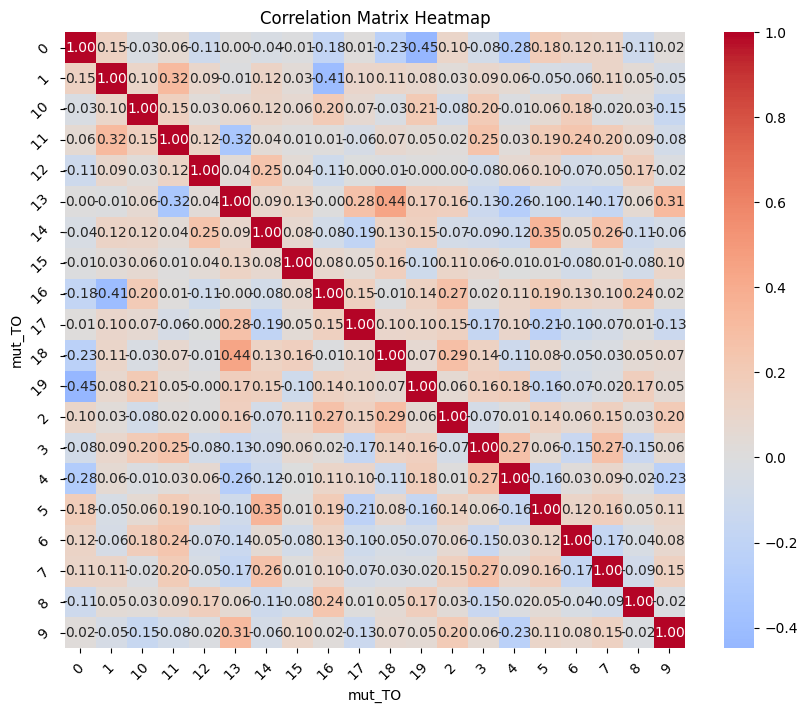

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your DataFrame with correlations

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Adjust the plot
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

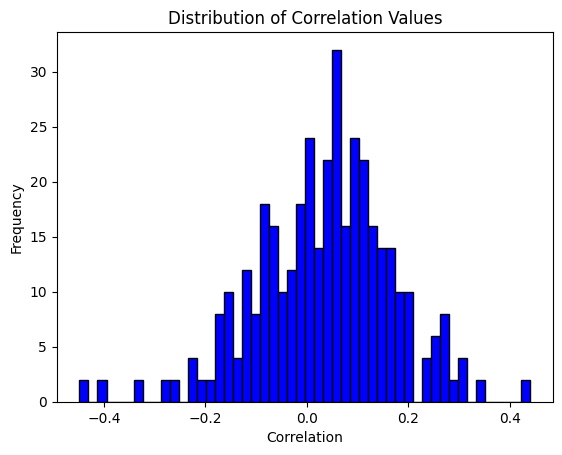

In [160]:
# Flatten the correlation matrix and filter out self-correlations
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]

# Plot histogram
plt.hist(correlation_values, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

In [161]:
threshold = np.mean(correlation_values)
print(threshold)
print(correlation_matrix)

0.03462855683717929
mut_TO        0         1        10        11        12        13        14   \
mut_TO                                                                         
0       1.000000  0.151220 -0.034551  0.057243 -0.112992  0.002085 -0.042285   
1       0.151220  1.000000  0.101292  0.315534  0.090788 -0.011073  0.122171   
10     -0.034551  0.101292  1.000000  0.151528  0.032438  0.064082  0.116072   
11      0.057243  0.315534  0.151528  1.000000  0.118300 -0.324184  0.041926   
12     -0.112992  0.090788  0.032438  0.118300  1.000000  0.036456  0.251505   
13      0.002085 -0.011073  0.064082 -0.324184  0.036456  1.000000  0.089507   
14     -0.042285  0.122171  0.116072  0.041926  0.251505  0.089507  1.000000   
15     -0.009242  0.033300  0.061773  0.005412  0.040210  0.127670  0.076698   
16     -0.179567 -0.406503  0.199086  0.013188 -0.107515 -0.000056 -0.075374   
17      0.011813  0.100368  0.071964 -0.062664 -0.002668  0.275062 -0.189241   
18     -0.227942  0.

In [162]:
import networkx as nx

In [164]:
G = nx.Graph()

# Assuming feat_df is your dataframe with the nodes and their attributes
# Assuming correlation_matrix is a pandas DataFrame with your correlations

# Add nodes with all attributes from feat_df, represented by 'Group' and 'mut_TO'
for idx, row in feat_df.iterrows():
    node_label = (row['Group'], row['mut_TO'])
    G.add_node(node_label, attr_dict=row.to_dict())

# Define a threshold for adding edges
threshold = 0.1  # Adjust this threshold as needed

# Add edges based on the correlation matrix and threshold, but exclude edges where mut_TO is the same
for i, row_i in feat_df.iterrows():
    for j, row_j in feat_df.iterrows():
        if i != j and row_i['mut_TO'] != row_j['mut_TO']:  # avoid self-loops and edges with same mut_TO
            corr_value = correlation_matrix.at[row_i['mut_TO'], row_j['mut_TO']]
            if corr_value > threshold:
                G.add_edge((row_i['Group'], row_i['mut_TO']), (row_j['Group'], row_j['mut_TO']), weight=corr_value)

# List every edge above the threshold
edges_above_threshold = []
for (node1, node2, data) in G.edges(data=True):
    if data['weight'] > threshold:
        node1_group, node1_mut_TO = node1
        node2_group, node2_mut_TO = node2
        edge_weight = data['weight']
        edges_above_threshold.append({
            'node1_group': node1_group,
            'node1_mut_TO': node1_mut_TO,
            'node2_group': node2_group,
            'node2_mut_TO': node2_mut_TO,
            'edge_weight': edge_weight
        })
print("Number of edges in the graph:", G.number_of_edges())
# Output the edges information
for edge in edges_above_threshold:
    print(edge)


Number of edges in the graph: 165701
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 1, 'node2_mut_TO': '1 ', 'edge_weight': 0.15121953342353767}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 1, 'node2_mut_TO': '2 ', 'edge_weight': 0.10393254744771468}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 1, 'node2_mut_TO': '5 ', 'edge_weight': 0.18215641876121597}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 1, 'node2_mut_TO': '6 ', 'edge_weight': 0.12253614437264039}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 1, 'node2_mut_TO': '7 ', 'edge_weight': 0.11305142976584506}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 2, 'node2_mut_TO': '1 ', 'edge_weight': 0.15121953342353767}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 2, 'node2_mut_TO': '2 ', 'edge_weight': 0.10393254744771468}
{'node1_group': 1, 'node1_mut_TO': '0 ', 'node2_group': 2, 'node2_mut_TO': '5 ', 'edge_weight': 0.18215641876121597}
{'node1_group': 1, 'node1_m

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



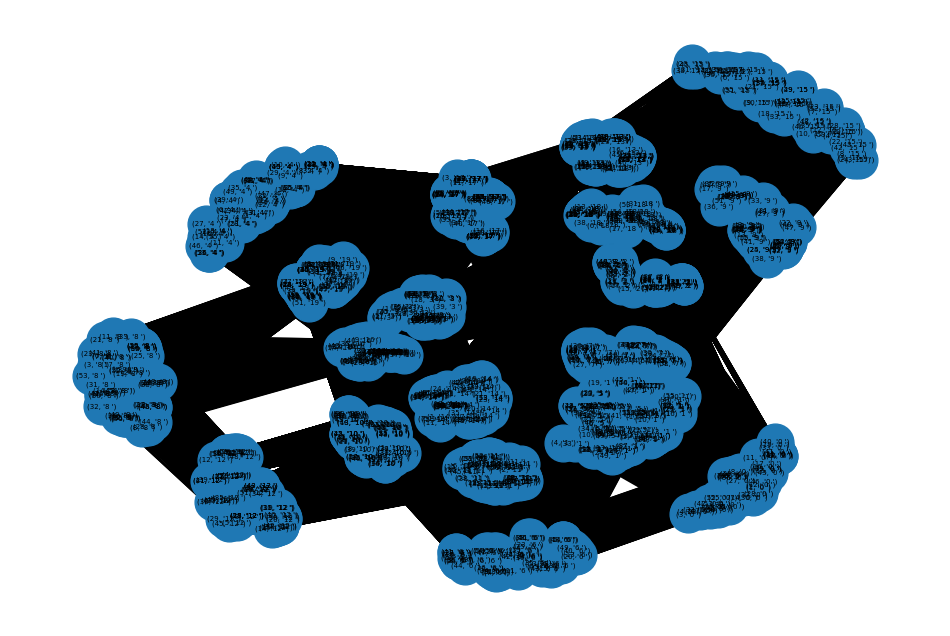

In [165]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')
plt.axis('off')
plt.show()


In [169]:
feat_df.shape

(1042, 8)